In [23]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')
print(model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

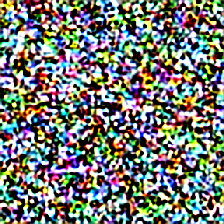

In [24]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np

img_path = 'images/prompt_7575498_seed_92875184_step_0.png'
#There is an interpolation method to match the source size with the target size
#image loaded in PIL (Python Imaging Library)
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
display(img)

In [25]:
IMAGE_PREFIX = 'images/prompt_7575498_seed_92875184_step_'
predictions = {}
for i in range(15):
    img_path = f'{IMAGE_PREFIX}{i}.png'
    img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
    
    # Converts a PIL Image to 3D Numpy Array
    x = image.img_to_array(img)
    x.shape
    # Adding the fouth dimension, for number of images
    x = np.expand_dims(x, axis=0)
    
    #mean centering with respect to Image
    x = preprocess_input(x)
    features = model.predict(x)
    p = decode_predictions(features)
    
    predictions[i] = p[0][0]

1/1 [==============================] - 0s 24ms/step


In [26]:
predictions

{0: ('n03598930', 'jigsaw_puzzle', 0.20035857),
 1: ('n03598930', 'jigsaw_puzzle', 0.21812108),
 2: ('n03598930', 'jigsaw_puzzle', 0.2885082),
 3: ('n03598930', 'jigsaw_puzzle', 0.3151678),
 4: ('n03598930', 'jigsaw_puzzle', 0.38958174),
 5: ('n03598930', 'jigsaw_puzzle', 0.34120622),
 6: ('n03598930', 'jigsaw_puzzle', 0.22399482),
 7: ('n03598930', 'jigsaw_puzzle', 0.1974342),
 8: ('n03598930', 'jigsaw_puzzle', 0.21207328),
 9: ('n03598930', 'jigsaw_puzzle', 0.28463504),
 10: ('n04465501', 'tractor', 0.41870812),
 11: ('n03930630', 'pickup', 0.21711805),
 12: ('n03777568', 'Model_T', 0.40019596),
 13: ('n03100240', 'convertible', 0.23078811),
 14: ('n03100240', 'convertible', 0.24062282)}